<a href="https://colab.research.google.com/github/LuisDLCP/ProyectoFinal_MineriaDatos/blob/main/3)Limpieza_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drives/')

Mounted at /content/drives/


In [ ]:
root_path="./drives/MyDrive/Master_Program_CC/AprendizajeAutomatico/Proyecto_final/"
dataset_path = root_path + "DataSet/"
!ls {dataset_path}

'1)Data_original'     dataset2.csv
'2)Data_etiquetada'   dataset2.xlsx
'3)Data_filtrada'     DATASET_BALANCEADO_noind.csv
'4)Data_grayscale'    DATASET_BALANCEADO_noind.xlsx
'5)Data_binary'       SUBMUESTREO
 dataset1.csv	      SUBMUESTREO_DATAFINAL
 dataset1.xlsx


## 1) Read the dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel(dataset_path+"dataset2.xlsx")
df.head()

,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5,Clase
0,con_mask1.png,0.101641,1301,0.302175,0.052199,451,0.222428,0.078472,339,0.268913,0.130093,281,0.336405,0.127915,373,0.333995,1
1,con_mask2.png,0.470391,6021,0.499123,0.272106,2351,0.445044,0.544213,2351,0.498041,0.745833,1611,0.435392,0.364198,1062,0.481204,1
2,con_mask3.png,0.255937,3276,0.436387,0.444792,3843,0.496943,0.488889,2112,0.499877,0.720370,1556,0.448817,0.774005,2257,0.418236,1
3,con_mask4.png,0.083203,1065,0.276189,0.085417,738,0.279501,0.167130,722,0.373092,0.333796,721,0.471568,0.243484,710,0.429185,1
4,con_mask5.png,0.403984,5171,0.490694,0.593403,5127,0.491198,0.718056,3102,0.449946,0.997222,2154,0.052631,0.711248,2074,0.453182,1


In [ ]:
df.tail().transpose()

,400,401,402,403,404
ID,sin_mask238.png,sin_mask239.png,sin_mask240.png,sin_mask241.png,sin_mask242.png
Promedio1,0.0175781,0.0671094,0.120234,0.118047,0.0217969
Suma1,225,859,1539,1511,279
STD1,0.131412,0.250211,0.325235,0.322664,0.14602
Promedio2,0.0387731,0.0290509,0.00555556,0.165856,0.0408565
Suma2,335,251,48,1433,353
STD2,0.193054,0.167949,0.0743283,0.371952,0.197958
Promedio3,0.0407407,0.0578704,0.00509259,0.177546,0.0435185
Suma3,176,250,22,767,188
STD3,0.197689,0.233498,0.0711805,0.38213,0.204021


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         405 non-null    object 
 1   Promedio1  405 non-null    float64
 2   Suma1      405 non-null    int64  
 3   STD1       405 non-null    float64
 4   Promedio2  405 non-null    float64
 5   Suma2      405 non-null    int64  
 6   STD2       405 non-null    float64
 7   Promedio3  405 non-null    float64
 8   Suma3      405 non-null    int64  
 9   STD3       405 non-null    float64
 10  Promedio4  405 non-null    float64
 11  Suma4      405 non-null    int64  
 12  STD4       405 non-null    float64
 13  Promedio5  405 non-null    float64
 14  Suma5      405 non-null    int64  
 15  STD5       405 non-null    float64
 16  Clase      405 non-null    int64  
dtypes: float64(10), int64(6), object(1)
memory usage: 53.9+ KB


In [ ]:
df.groupby("Clase").count()

,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5
Clase,,,,,,,,,,,,,,,,
0,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242
1,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163


## 2) Manage outliers

### 2.1) Identify outliers 

In [ ]:
# Identify outliers and replace them with nan values 
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = np.nan #mean        # or "group[~outliers].mean()"
    return group

df_new = df.groupby('Clase').transform(replace)
df_id = df["ID"]
df_clase = df["Clase"]
df2_aux1 = pd.concat([df_id, df_new, df_clase], axis=1, sort=False)
df2_aux1.head()

,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5,Clase
0,con_mask1.png,0.101641,1301.0,0.302175,0.052199,451.0,0.222428,0.078472,339.0,0.268913,0.130093,281.0,0.336405,0.127915,373.0,0.333995,1
1,con_mask2.png,0.470391,6021.0,0.499123,0.272106,2351.0,0.445044,0.544213,2351.0,0.498041,0.745833,1611.0,0.435392,0.364198,1062.0,0.481204,1
2,con_mask3.png,0.255937,3276.0,0.436387,0.444792,3843.0,0.496943,0.488889,2112.0,0.499877,0.720370,1556.0,0.448817,0.774005,2257.0,0.418236,1
3,con_mask4.png,0.083203,1065.0,0.276189,0.085417,738.0,0.279501,0.167130,722.0,0.373092,0.333796,721.0,0.471568,0.243484,710.0,0.429185,1
4,con_mask5.png,0.403984,5171.0,0.490694,0.593403,5127.0,0.491198,0.718056,3102.0,0.449946,0.997222,2154.0,0.052631,0.711248,2074.0,0.453182,1


In [ ]:
# Quantify the number of outliers(Nan Values) and print them by class
df2_aux2 = df2_aux1.isna()
df2_aux2["Clase"]=df2_aux1["Clase"]

df2_aux3 = df2_aux2.groupby("Clase").sum()
df2_aux3.transpose()

Clase,0,1
ID,0,0
Promedio1,4,0
Suma1,4,0
STD1,0,0
Promedio2,5,0
Suma2,5,0
STD2,0,0
Promedio3,7,0
Suma3,7,0
STD3,0,0


In [ ]:
# Print the number of outliers 
df2_aux3.sum(axis=1)

Clase
0    56
1     5
dtype: int64

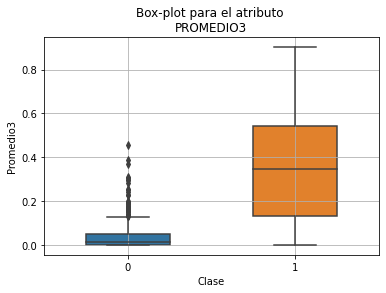

In [ ]:
# Boxplot with seaborn 
sns.boxplot(x='Clase', 
            y='Promedio3',
            data=df,
            width=0.5,
            #palette='Set3'
            )
plt.title("Box-plot para el atributo \nPROMEDIO3")
plt.grid()

### 2.2) Identify the outliers and then replace them with the mean value

In [ ]:
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = mean        
    return group

df_new = df.groupby('Clase').transform(replace)
df_id = df["ID"]
df_clase = df["Clase"]
df2 = pd.concat([df_id, df_new, df_clase], axis=1, sort=False)
df2.head()

,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5,Clase
0,con_mask1.png,0.101641,1301.0,0.302175,0.052199,451.0,0.222428,0.078472,339.0,0.268913,0.130093,281.0,0.336405,0.127915,373.0,0.333995,1
1,con_mask2.png,0.470391,6021.0,0.499123,0.272106,2351.0,0.445044,0.544213,2351.0,0.498041,0.745833,1611.0,0.435392,0.364198,1062.0,0.481204,1
2,con_mask3.png,0.255937,3276.0,0.436387,0.444792,3843.0,0.496943,0.488889,2112.0,0.499877,0.720370,1556.0,0.448817,0.774005,2257.0,0.418236,1
3,con_mask4.png,0.083203,1065.0,0.276189,0.085417,738.0,0.279501,0.167130,722.0,0.373092,0.333796,721.0,0.471568,0.243484,710.0,0.429185,1
4,con_mask5.png,0.403984,5171.0,0.490694,0.593403,5127.0,0.491198,0.718056,3102.0,0.449946,0.997222,2154.0,0.052631,0.711248,2074.0,0.453182,1


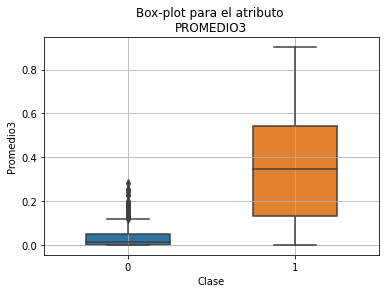

In [ ]:
# Boxplot with seaborn 
sns.boxplot(x='Clase', 
            y='Promedio3',
            data=df2,
            width=0.5,
            #palette='Set3'
            )
plt.title("Box-plot para el atributo \nPROMEDIO3")
plt.grid()

## 3) Oversampling

In [ ]:
max_size = df2['Clase'].value_counts().max()
max_size

242

In [ ]:
# Oversampling 
lst = [df2]
for class_index, group in df2.groupby('Clase'):
    lst.append(group.sample(max_size-len(group), replace=True))
df3 = pd.concat(lst)
df3.sort_index(inplace=True)
df3.head()

,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5,Clase
0,con_mask1.png,0.101641,1301.0,0.302175,0.052199,451.0,0.222428,0.078472,339.0,0.268913,0.130093,281.0,0.336405,0.127915,373.0,0.333995,1
1,con_mask2.png,0.470391,6021.0,0.499123,0.272106,2351.0,0.445044,0.544213,2351.0,0.498041,0.745833,1611.0,0.435392,0.364198,1062.0,0.481204,1
2,con_mask3.png,0.255937,3276.0,0.436387,0.444792,3843.0,0.496943,0.488889,2112.0,0.499877,0.720370,1556.0,0.448817,0.774005,2257.0,0.418236,1
2,con_mask3.png,0.255937,3276.0,0.436387,0.444792,3843.0,0.496943,0.488889,2112.0,0.499877,0.720370,1556.0,0.448817,0.774005,2257.0,0.418236,1
3,con_mask4.png,0.083203,1065.0,0.276189,0.085417,738.0,0.279501,0.167130,722.0,0.373092,0.333796,721.0,0.471568,0.243484,710.0,0.429185,1


In [ ]:
# Verifying 
df3.groupby('Clase').count()

,ID,Promedio1,Suma1,STD1,Promedio2,Suma2,STD2,Promedio3,Suma3,STD3,Promedio4,Suma4,STD4,Promedio5,Suma5,STD5
Clase,,,,,,,,,,,,,,,,
0,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242
1,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242,242


## 4) Save df as an excel file  

In [ ]:
# Save as excel 
df3.to_excel(dataset_path + 'dataset3.xlsx', index=False)
df3.to_csv(dataset_path + 'dataset3.csv')